In [1]:
from utils.utils import get_features_label, split_csv

from preprocessing.cleaning import get_cleaned_data
from preprocessing.encoding import encode_data

from exploration.data_correlations import plot_correlations
from exploration.data_statistics import plot_labels_pie_chart, plot_blood_draw_statistics
from exploration.midterm_exploration import plot_feature_against_diagnosis

from modeling.mrmr import plot_accuracy_with_features, perform_mrmr
from modeling.logistic import run_elastic_net, evaluate_results
from modeling.mlp import run_mlp, evaluate_mlp

In [2]:
df = encode_data(get_cleaned_data())
combined, blood_only, clinical_only = split_csv(df)

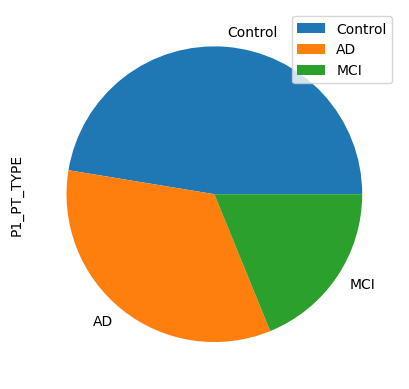

In [3]:
plot_labels_pie_chart(df, png="Pie Chart of Diagnoses")

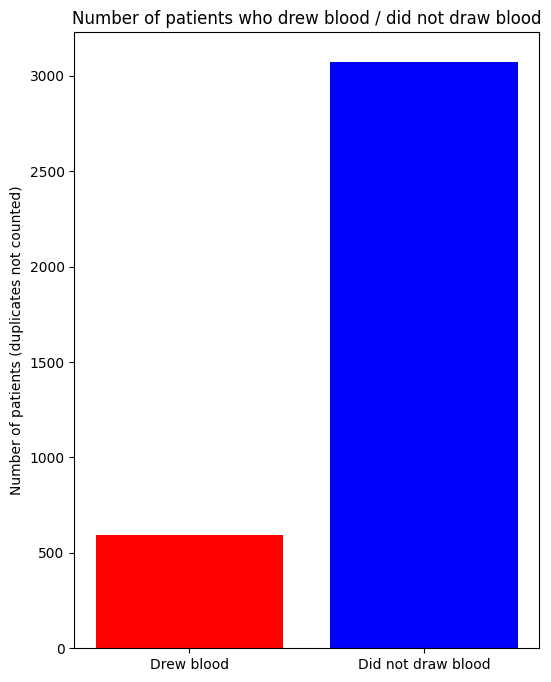

In [4]:
plot_blood_draw_statistics(df, png="Blood Draw Proportions")

In [ ]:
plot_correlations(df)

In [ ]:
plot_feature_against_diagnosis(
    blood_only,
    "Q1_Total_tau",
    title="Total Tau Concentration by Diagnosis",
    ylabel="Total Tau Concentration (pg/mL)",
    png="Total Tau Concentration by Diagnosis"
)

In [ ]:
plot_feature_against_diagnosis(
    clinical_only,
    "C1_MMSE",
    title="MMSE Score by Diagnosis",
    ylabel="MMSE Score",
    png="MMSE Score by Diagnosis"
)

In [ ]:
plot_feature_against_diagnosis(
    clinical_only,
    "C1_WMSR_DIGTOT",
    title="WMSR Digit Span Score by Diagnosis",
    ylabel="WMSR Digit Span Score",
    png="WMSR Digit Span Score by Diagnosis"
)

100%|██████████| 415/415 [01:31<00:00,  4.52it/s]


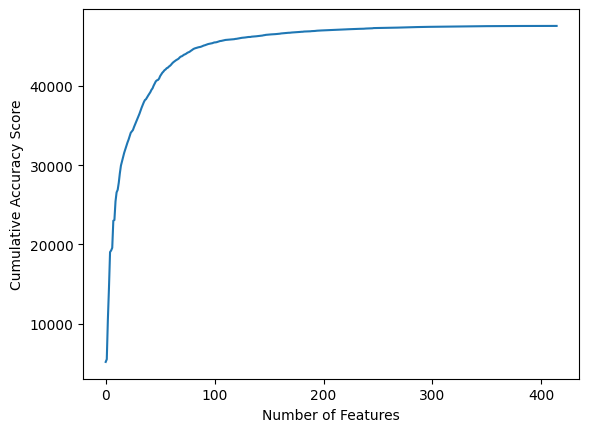

In [3]:
import pandas as pd

y, X = get_features_label(df)
y = pd.Series(y)
plot_accuracy_with_features(X, y)

In [3]:
import pandas as pd
blood_only_selected_features = perform_mrmr(blood_only.drop("P1_PT_TYPE", axis=1), pd.Series(blood_only["P1_PT_TYPE"]), 100, True)
clinical_only_selected_features = perform_mrmr(clinical_only.drop("P1_PT_TYPE", axis=1), pd.Series(clinical_only["P1_PT_TYPE"]), 100, True)
combined_selected_features = perform_mrmr(combined.drop("P1_PT_TYPE", axis=1), pd.Series(combined["P1_PT_TYPE"]), 100, True)

100%|██████████| 100/100 [00:04<00:00, 23.70it/s]


In [ ]:
run_elastic_net(blood_only, num_iters=20, pickle="Blood Only Elastic Net")

In [4]:
evaluate_results("Blood Only Elastic Net")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.6
Micro-F1 score: 0.8403361344537815
Feature importances: Index(['APOE_GENOTYPE_nan', 'Q1_GFAP', 'APOE_GENOTYPE_e2/e3', 'RBM_PAI_1',
       'PROTEO_FACTOR_VII', 'RBM_IGF_BP_2', 'RBM_CTGF', 'RBM_HCC_4',
       'RBM_VCAM_1', 'RBM_TNF_beta',
       ...
       'PROTEO_PYY', 'RBM_EN_RAGE', 'Q1_YKL_40', 'PROTEO_SVCAM_1', 'RBM_IL_18',
       'PROTEO_TIE_2', 'PROTEO_FLT_1', 'RBM_Prolactin', 'PROTEO_MPO',
       'RBM_THPO'],
      dtype='object', length=196)
Confusion matrix:
[[45 14]
 [ 5 55]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.2
Micro-F1 score: 0.8487394957983193
Feature importances: Index(['APOE_GENOTYPE_nan', 'RBM_THPO', 'APOE_GENOTYPE_e3/e3', 'RBM_IL_15',
       'RBM_TECK', 'PROTEO_PYY', 'PROTEO_LBP', 'RBM_B2M', 'RBM_RANTES',
       'RBM_PARC',
       ...
       'RBM_GSTs', 'RBM_Active_GLP_1', 'RBM_G_CSF', 'RBM_Complement_3',
       'RBM_TNF_beta', 'APOE_GENOTYPE_e4/e4', 'RBM_Leptin', 'RBM_IGF_1',
       'RBM_CTGF', 'PROTEO_MPO'],
      dtype

In [ ]:
run_elastic_net(clinical_only, num_iters=20, pickle="Clinical Only Elastic Net")

In [5]:
evaluate_results("Clinical Only Elastic Net")

Iteration 0
Best C: 100.0
Best l1 ratio: 0
Micro-F1 score: 0.8285024154589372
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2',
       'C1_WMSR_VRII', 'F1_PSMSTOTSCR', 'C1_WMSR_LMEM1', 'C1_SS_TRAILB',
       'C1_WMS3_VRI', 'D1_DEPIF_2.0',
       ...
       'B5_NITESEV_1.0', 'A5_CVANGIO_1.0', 'B1_HEIGHT', 'A5_INCONTU_1.0',
       'A5_ARTHRITIC_1.0', 'A5_PACKSPER_8.0', 'C1_WAIS3_DIGTOT',
       'A3_PROP_PARENTS_DEM_1.0', 'A5_HYPERCHO_1.0', 'B1_WEIGHT'],
      dtype='object', length=265)
Confusion matrix:
[[ 882   30   55]
 [  14 1249   99]
 [  87  212  270]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.8291925465838509
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2',
       'C1_WMSR_VRII', 'C1_WMS3_VRI', 'C1_SS_TRAILB', 'B5_NPIQINF',
       'A1_HISPANIC_1.0', 'F1_PSMSTOTSCR',
       ...
       'B1_VISION_1.0', 'A5_HYPERTEN_1.0', 'B5_AGITSEV_1.0', 'A5_THYROID_1.0',
       'A1_SEX_1.0'

In [ ]:
run_elastic_net(combined, num_iters=20, pickle="Combined Elastic Net")

In [6]:
evaluate_results("Combined Elastic Net")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.6
Micro-F1 score: 0.9411764705882353
Feature importances: Index(['C1_SS_TRAILB', 'APOE_GENOTYPE_nan', 'C1_WMS3_LMEM2', 'C1_WMSR_LMEM2',
       'F2_IADLTOTSCR', 'APOE_GENOTYPE_e3/e3', 'RBM_CRP', 'C1_WMS3_LMEM1',
       'APOE_GENOTYPE_e2/e3', 'C1_SS_TRAILA',
       ...
       'PROTEO_SVCAM_1', 'B1_HEARING_1.0', 'C1_WMSR_LMEM1', 'RBM_Prolactin',
       'B5_NPIQINF', 'RBM_HGF', 'Q1_YKL_40', 'RBM_MIP_1a', 'RBM_TECK',
       'RBM_SCF'],
      dtype='object', length=461)
Confusion matrix:
[[61  3]
 [ 4 51]]

Iteration 1
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.9411764705882353
Feature importances: Index(['C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM2', 'APOE_GENOTYPE_nan',
       'C1_WMS3_LMEM1', 'C1_SS_TRAILA', 'APOE_GENOTYPE_e3/e3', 'F2_IADLTOTSCR',
       'B5_NPIQINF', 'AGE',
       ...
       'A5_PACKSPER_5.0', 'A5_PACKSPER_8.0', 'A5_PSYCDIS_1.0',
       'A5_PSYCDIS_2.0', 'A3_PROP_PARENTS_DEM_5.0', 'B5_APASEV_1.0',
       'B5_AGITSEV_1.0',

In [ ]:
run_elastic_net(blood_only[blood_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Blood Only Elastic Net With Feature Selection")

In [7]:
evaluate_results("Blood Only Elastic Net With Feature Selection")

Iteration 0
Best C: 0.1
Best l1 ratio: 0.4
Micro-F1 score: 0.8235294117647058
Feature importances: Index(['APOE_GENOTYPE_nan', 'APOE_GENOTYPE_e2/e3', 'RBM_THPO', 'PROTEO_PYY',
       'RBM_PAI_1', 'PROTEO_FACTOR_VII', 'RBM_Eotaxin', 'PROTEO_TARC_HUMAN',
       'RBM_Angiotensinogen', 'RBM_MIP_1b', 'RBM_Alpha_2',
       'PROTEO_MCP_4_HUMAN', 'PROTEO_NT_PROBNP', 'RBM_IL_1ra',
       'PROTEO_ADIPONECTIN', 'RBM_VCAM_1', 'PROTEO_TNF_A_HUMAN',
       'RBM_IGF_BP_2', 'RBM_PARC', 'RBM_Cortisol', 'PROTEO_IL_6_HUMAN',
       'RBM_TECK', 'PROTEO_VEGF_ANGIO_PLATE', 'PROTEO_FLT_1', 'RBM_ASP',
       'PROTEO_FABP3', 'PROTEO_PIGF', 'PROTEO_EOTAXIN_HUMAN',
       'Q1_Quanterix_1.0', 'RBM_S100b', 'PROTEO_GLUCAGON', 'RBM_G_CSF',
       'Q1_Quanterix_tp', 'PROTEO_IL_2_HUMAN', 'PROTEO_IL_12_P40_HUMAN',
       'PROTEO_VEGF_D', 'RBM_IgE', 'RBM_PP', 'PROTEO_TOTAL_GIP', 'RBM_VDBP',
       'RBM_CK_MB', 'PROTEO_RESISTIN', 'RBM_TNF_alpha', 'RBM_IL_8', 'RBM_CD40',
       'RBM_IgM', 'Q1_CD14', 'RBM_THPO_1', 'RBM_GST

In [ ]:
run_elastic_net(clinical_only[clinical_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Clinical Only Elastic Net With Feature Selection")

In [8]:
evaluate_results("Clinical Only Elastic Net With Feature Selection")

Iteration 0
Best C: 1000.0
Best l1 ratio: 0
Micro-F1 score: 0.8354037267080745
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'C1_WMS3_LMEM2',
       'C1_WMS3_VRI', 'C1_WMSR_LMEM2', 'F1_PSMSTOTSCR', 'C1_SS_TRAILB',
       'D1_DEPIF_2.0', 'B5_NPIQINF', 'A1_HISPANIC_1.0', 'AGE',
       'B1_VISWCORR_1.0', 'D1_DEMUNIF_1.0', 'B1_VISCORR_1.0', 'C1_CLOCK',
       'C1_WMS3_LMEM1', 'A5_INCONTU_1.0', 'D1_DYSILLIF_2.0', 'B5_IRRSEV_1.0',
       'C1_WAISR_DIGTOT', 'A5_PSYCDIS_1.0', 'D1_DLBIF_2.0', 'B5_DISNSEV_2.0',
       'B1_HEARAID_1.0', 'B5_DELSEV_3.0', 'B5_MOTSEV_1.0', 'D1_COGOTHIF_2.0',
       'B5_DISNSEV_3.0', 'B5_IRRSEV_2.0', 'D1_POS_VASCIF_2.0', 'A1_SEX_1.0',
       'B5_NITESEV_2.0', 'B5_DEPDSEV_2.0', 'B5_NITESEV_3.0',
       'A5_ARTHRITIC_2.0', 'A5_SEIZURES_nan', 'B5_DEPDSEV_3.0',
       'B5_APASEV_2.0', 'B5_APASEV_1.0', 'B5_DELSEV_2.0', 'B5_DISNSEV_1.0',
       'A1_MARISTAT_3.0', 'A5_PACKSPER_3.0', 'B5_AGITSEV_3.0', 'B5_APPSEV_2.0',
       'B5_NITESEV_1.0', 'A

In [ ]:
run_elastic_net(combined[combined_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Combined Elastic Net With Feature Selection")

In [9]:
evaluate_results("Combined Elastic Net With Feature Selection")

Iteration 0
Best C: 0.1
Best l1 ratio: 1
Micro-F1 score: 0.9747899159663865
Feature importances: Index(['C1_WMS3_LMEM2', 'C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'APOE_GENOTYPE_nan',
       'APOE_GENOTYPE_e3/e3', 'RBM_TNF_beta', 'C1_CLOCK', 'C1_WMS3_VRI',
       'C1_WMS3_LMEM1', 'RBM_Factor_VII', 'RBM_THPO', 'B5_AGITSEV_2.0',
       'PROTEO_SVCAM_1', 'B1_BMI', 'B5_MOTSEV_1.0', 'B1_HEARING_1.0',
       'B5_MOTSEV_2.0', 'B5_DEPDSEV_1.0', 'B5_IRRSEV_1.0', 'B5_ANXSEV_1.0',
       'B1_BPSYS', 'Q1_GFAP', 'PROTEO_EOTAXIN_HUMAN', 'B5_APPSEV_2.0',
       'B5_DELSEV_1.0', 'A5_PACKSPER_nan', 'A5_INCONTF_1.0', 'C1_WMSR_LMEM1',
       'B5_IRRSEV_2.0', 'B5_APASEV_2.0', 'C1_WMSR_VRII', 'A5_INCONTU_1.0',
       'D1_COGOTHIF_3.0', 'C1_SS_TRAILA', 'F2_IADLTOTSCR', 'AGE',
       'APOE_GENOTYPE_e2/e3', 'B5_NITESEV_1.0', 'B5_AGITSEV_1.0', 'PROTEO_PYY',
       'B5_ANXSEV_2.0', 'B5_APASEV_1.0', 'C1_WAIS3_DIGTOT', 'B5_DISNSEV_1.0',
       'RBM_Tenascin_C', 'A5_DEP2YRS_1.0', 'Q1_Quanterix_1.0', 'B5_APPSEV_1.0',
      

In [4]:
run_mlp(blood_only, num_iters=20, pickle="Blood Only MLP")

{'features': Index(['PROTEO_ADIPONECTIN', 'PROTEO_BFGF', 'PROTEO_CLUSTERIN', 'PROTEO_CRP',
        'PROTEO_EOTAXIN_HUMAN', 'PROTEO_EOTAXIN_3_HUMAN', 'PROTEO_FABP3',
        'PROTEO_FACTOR_VII', 'PROTEO_FLT_1', 'PROTEO_GLUCAGON',
        ...
        'APOE_GENOTYPE_e3/e4', 'APOE_GENOTYPE_e4/e4', 'APOE_GENOTYPE_nan',
        'RBM_Rule_Based_Medicine_1.0', 'RBM_Rule_Based_Medicine_nan',
        'RBM_Batch_2.0', 'RBM_Batch_3.0', 'RBM_Batch_nan', 'Q1_Quanterix_1.0',
        'Q1_Quanterix_nan'],
       dtype='object', length=196),
 'models': [MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 

In [5]:
evaluate_mlp("Blood Only MLP")

Iteration 0
Best Loss: 0.00352953934139203
Best Validation Score: None
Micro-F1 score: 0.8319327731092437
Feature importances: Index(['APOE_GENOTYPE_nan', 'APOE_GENOTYPE_e3/e3', 'APOE_GENOTYPE_e2/e3',
       'RBM_CTGF', 'RBM_THPO', 'RBM_AgRP', 'RBM_MIP_1a', 'Q1_Quanterix_tp',
       'RBM_PDGF', 'PROTEO_VEGF_D',
       ...
       'RBM_SAP', 'RBM_TNF_RII', 'PROTEO_IL_12_P40_HUMAN', 'PROTEO_TOTAL_GIP',
       'PROTEO_IL_5_HUMAN', 'RBM_IL_12p40', 'RBM_ICAM_1', 'PROTEO_IP_10_HUMAN',
       'RBM_IL_16', 'RBM_OSM'],
      dtype='object', length=196)
Confusion matrix:
[[53 12]
 [ 8 46]]

Iteration 1
Best Loss: 0.003765418020130246
Best Validation Score: None
Micro-F1 score: 0.7394957983193278
Feature importances: Index(['APOE_GENOTYPE_nan', 'APOE_GENOTYPE_e3/e3', 'APOE_GENOTYPE_e2/e3',
       'RBM_CTGF', 'Q1_Quanterix_1.0', 'PROTEO_MIP_1A_HUMAN', 'RBM_FAS',
       'RBM_CD40', 'RBM_MIP_1b', 'RBM_BTC',
       ...
       'RBM_HGF', 'RBM_TIMP_1', 'RBM_TBG', 'RBM_VWF', 'RBM_THPO_1',
       'RBM_EN_

In [6]:
run_mlp(clinical_only, num_iters=20, pickle="Clinical Only MLP")

{'features': Index(['AGE', 'A42_VEAS', 'A5_QUITSMOK', 'A5_SMOKYRS', 'B1_BMI', 'B1_BPDIAS',
        'B1_BPSYS', 'B1_HEIGHT', 'B1_HRATE', 'B1_WEIGHT',
        ...
        'D1_PPAPHIF_nan', 'D1_PRIONIF_nan', 'D1_PSPIF_nan', 'D1_STROKEIF_1.0',
        'D1_STROKEIF_2.0', 'D1_STROKEIF_3.0', 'D1_STROKEIF_nan',
        'D1_VASCIF_1.0', 'D1_VASCIF_2.0', 'D1_VASCIF_nan'],
       dtype='object', length=265),
 'models': [MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_

In [7]:
evaluate_mlp("Clinical Only MLP")

Iteration 0
Best Loss: 0.05078356899565082
Best Validation Score: None
Micro-F1 score: 0.8095238095238095
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMS3_LMEM2', 'C1_WMS3_VRI', 'AGE',
       'C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'C1_WMSR_VRII', 'A1_HISPANIC_1.0',
       'B5_NPIQINF',
       ...
       'A5_IBD_nan', 'B1_BPDIAS', 'A5_CBTIA_nan', 'A5_AUTOIMM_1.0',
       'A5_HYPERCHO_2.0', 'A5_INCONTU_2.0', 'A5_CVPACE_1.0', 'B1_BPSYS',
       'B5_ANXSEV_1.0', 'A1_MARISTAT_5.0'],
      dtype='object', length=265)
Confusion matrix:
[[ 840   34   69]
 [  25 1196  171]
 [  92  161  310]]

Iteration 1
Best Loss: 0.05084023350499653
Best Validation Score: None
Micro-F1 score: 0.8091787439613527
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMS3_LMEM2', 'C1_WMS3_VRI', 'AGE',
       'C1_SS_TRAILB', 'C1_WMSR_VRII', 'A1_HISPANIC_1.0', 'C1_WMSR_LMEM2',
       'F1_PSMSTOTSCR',
       ...
       'A5_TOBAC30_1.0', 'A5_DIABETES_1.0', 'A5_B12DEF_1.0', 'B5_ANXSEV_1.0',
  

In [8]:
run_mlp(combined, num_iters=20, pickle="Combined MLP")

{'features': Index(['AGE', 'A42_VEAS', 'A5_QUITSMOK', 'A5_SMOKYRS', 'B1_BMI', 'B1_BPDIAS',
        'B1_BPSYS', 'B1_HEIGHT', 'B1_HRATE', 'B1_WEIGHT',
        ...
        'D1_VASCIF_1.0', 'D1_VASCIF_2.0', 'D1_VASCIF_nan',
        'RBM_Rule_Based_Medicine_1.0', 'RBM_Rule_Based_Medicine_nan',
        'RBM_Batch_2.0', 'RBM_Batch_3.0', 'RBM_Batch_nan', 'Q1_Quanterix_1.0',
        'Q1_Quanterix_nan'],
       dtype='object', length=461),
 'models': [MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(hidden_layer_sizes=[20, 20], max_iter=300),
  MLPClassifier(

In [9]:
evaluate_mlp("Combined MLP")

Iteration 0
Best Loss: 0.0026405847325033528
Best Validation Score: None
Micro-F1 score: 0.8991596638655462
Feature importances: Index(['C1_WMSR_LMEM2', 'A5_INCONTF_1.0', 'APOE_GENOTYPE_nan', 'B5_APASEV_1.0',
       'RBM_Tenascin_C', 'B5_DISNSEV_1.0', 'PROTEO_VEGF_ANGIO_PLATE',
       'RBM_TRAIL_R3', 'A5_CBSTROKE_2.0', 'RBM_IGF_1',
       ...
       'RBM_CEA', 'RBM_CK_MB', 'RBM_CD40L', 'RBM_Testosterone',
       'RBM_ACE_CD143', 'A5_CVBYPASS_1.0', 'RBM_Angiotensinogen',
       'PROTEO_LEPTIN', 'APOE_GENOTYPE_e2/e4', 'RBM_EN_RAGE'],
      dtype='object', length=461)
Confusion matrix:
[[54  4]
 [ 8 53]]

Iteration 1
Best Loss: 0.0025492669469948147
Best Validation Score: None
Micro-F1 score: 0.9327731092436976
Feature importances: Index(['C1_SS_TRAILB', 'C1_WMSR_LMEM2', 'RBM_S100b', 'APOE_GENOTYPE_e4/e4',
       'AGE', 'APOE_GENOTYPE_nan', 'C1_WMS3_LMEM1', 'RBM_EN_RAGE',
       'C1_WMS3_LMEM2', 'F2_IADLTOTSCR',
       ...
       'RBM_APO_A1', 'RBM_FABP', 'RBM_SGOT', 'RBM_ENA_78', 'RBM_EG

In [10]:
run_mlp(blood_only[blood_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Blood Only MLP With Feature Selection")

{'features': Index(['APOE_GENOTYPE_nan', 'Q1_GFAP', 'RBM_Factor_VII', 'APOE_GENOTYPE_e3/e3',
        'PROTEO_PYY', 'APOE_GENOTYPE_e2/e3', 'RBM_TNF_beta', 'RBM_Tenascin_C',
        'RBM_THPO', 'PROTEO_EOTAXIN_HUMAN', 'PROTEO_SVCAM_1',
        'Q1_Quanterix_1.0', 'RBM_S100b', 'RBM_PAI_1', 'PROTEO_GLUCAGON',
        'RBM_G_CSF', 'Q1_Quanterix_tp', 'PROTEO_IL_2_HUMAN',
        'PROTEO_IL_12_P40_HUMAN', 'RBM_VWF', 'PROTEO_TARC_HUMAN',
        'PROTEO_VEGF_D', 'RBM_IgE', 'RBM_B2M', 'APOE_GENOTYPE_e3/e4', 'RBM_PP',
        'PROTEO_TOTAL_GIP', 'RBM_VDBP', 'RBM_CK_MB', 'RBM_ASP', 'PROTEO_PIGF',
        'PROTEO_FABP3', 'RBM_IGF_BP_2', 'PROTEO_FLT_1', 'RBM_MIP_1b',
        'RBM_Alpha_2', 'RBM_CRP', 'PROTEO_MCP_4_HUMAN', 'PROTEO_NT_PROBNP',
        'APOE_GENOTYPE_e4/e4', 'RBM_IL_1ra', 'PROTEO_ADIPONECTIN',
        'RBM_Angiotensinogen', 'PROTEO_TNF_A_HUMAN', 'RBM_VCAM_1', 'Q1_YKL_40',
        'RBM_PARC', 'RBM_Cortisol', 'PROTEO_IL_6_HUMAN', 'RBM_IL_15',
        'PROTEO_MPO', 'PROTEO_VEGF_ANGIO_PLA

In [11]:
evaluate_mlp("Blood Only MLP With Feature Selection")

Iteration 0
Best Loss: 0.004218610867612313
Best Validation Score: None
Micro-F1 score: 0.7899159663865545
Feature importances: Index(['APOE_GENOTYPE_nan', 'APOE_GENOTYPE_e2/e3', 'APOE_GENOTYPE_e3/e3',
       'RBM_THPO', 'RBM_GSTs', 'RBM_Eotaxin', 'Q1_Quanterix_tp', 'RBM_TNF_RII',
       'PROTEO_VEGF_D', 'RBM_VWF', 'RBM_IgE', 'RBM_TECK', 'RBM_IgM',
       'RBM_RANTES', 'RBM_VDBP', 'PROTEO_GLUCAGON', 'RBM_MCP_1',
       'PROTEO_SICAM_1', 'RBM_Adiponectin', 'PROTEO_IL_12_P40_HUMAN',
       'PROTEO_ADIPONECTIN', 'PROTEO_PYY', 'RBM_MMP_3', 'RBM_CTGF',
       'RBM_MIP_1a', 'PROTEO_TNF_A_HUMAN', 'RBM_IL_13', 'Q1_GFAP',
       'RBM_THPO_1', 'RBM_Tenascin_C', 'PROTEO_IL_8_HUMAN', 'RBM_PAI_1',
       'PROTEO_FABP3', 'PROTEO_VEGF_ANGIO_PLATE', 'RBM_HGF',
       'Q1_Quanterix_1.0', 'RBM_CK_MB', 'PROTEO_FACTOR_VII', 'RBM_PAP',
       'RBM_MIP_1b', 'RBM_AgRP', 'RBM_IL_15', 'RBM_TNF_beta',
       'PROTEO_IP_10_HUMAN', 'PROTEO_IL_5_HUMAN', 'RBM_I_309', 'RBM_S100b',
       'RBM_CD40', 'RBM_Cortisol', 

In [12]:
run_mlp(clinical_only[clinical_only_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20,
                pickle="Clinical Only MLP With Feature Selection")

{'features': Index(['F2_IADLTOTSCR', 'D1_DEPIF_2.0', 'C1_WMS3_LMEM2', 'D1_DEMUNIF_1.0',
        'C1_SS_TRAILB', 'C1_WMS3_LMEM1', 'B5_NPIQINF', 'C1_WMS3_VRI',
        'A1_HISPANIC_1.0', 'C1_SS_TRAILA', 'AGE', 'D1_DYSILLIF_2.0',
        'B5_AGITSEV_1.0', 'C1_WAIS3_DIGTOT', 'F1_PSMSTOTSCR', 'B5_APASEV_1.0',
        'B5_APASEV_2.0', 'B1_BMI', 'B5_AGITSEV_2.0', 'B5_DISNSEV_1.0',
        'B5_ANXSEV_1.0', 'B5_DISNSEV_2.0', 'A5_ARTHRITIC_1.0', 'B5_MOTSEV_1.0',
        'C1_WMSR_LMEM2', 'B5_IRRSEV_1.0', 'B5_MOTSEV_2.0', 'C1_CLOCK',
        'B5_APPSEV_2.0', 'B5_APPSEV_1.0', 'B5_IRRSEV_2.0', 'A5_INCONTU_1.0',
        'B5_DELSEV_1.0', 'B5_NITESEV_2.0', 'B5_ANXSEV_2.0', 'B5_NITESEV_1.0',
        'B5_APASEV_3.0', 'B5_DEPDSEV_1.0', 'B5_DELSEV_2.0', 'D1_COGOTHIF_2.0',
        'A5_INCONTF_1.0', 'C1_WMSR_DIGTOT', 'A1_SEX_1.0', 'B5_HALLSEV_1.0',
        'B5_MOTSEV_3.0', 'C1_WMSR_VRII', 'A5_DIABETES_1.0', 'A5_DEP2YRS_1.0',
        'B1_WEIGHT', 'A1_MARISTAT_3.0', 'B5_APPSEV_3.0', 'A5_PSYCDIS_1.0',
        '

In [13]:
evaluate_mlp("Clinical Only MLP With Feature Selection")

Iteration 0
Best Loss: 0.1334120333831287
Best Validation Score: None
Micro-F1 score: 0.8081435472739821
Feature importances: Index(['F2_IADLTOTSCR', 'C1_WMSR_VRI', 'C1_WMS3_LMEM2', 'A1_HISPANIC_1.0',
       'C1_SS_TRAILB', 'AGE', 'C1_WMS3_VRI', 'C1_WMSR_LMEM2', 'F1_PSMSTOTSCR',
       'C1_WMSR_VRII', 'C1_WMS3_LMEM1', 'B1_WEIGHT', 'A1_RACE_nan',
       'D1_DEPIF_2.0', 'B1_BMI', 'B5_NPIQINF', 'C1_CLOCK', 'C1_SS_TRAILA',
       'C1_WAIS3_DIGTOT', 'B1_HEARAID_1.0', 'B1_VISWCORR_1.0',
       'D1_DEMUNIF_1.0', 'A5_HYPERCHO_1.0', 'A1_SEX_1.0', 'B5_HALLSEV_1.0',
       'B1_VISCORR_1.0', 'B5_DISNSEV_2.0', 'B5_APPSEV_2.0', 'A1_MARISTAT_2.0',
       'B5_DELSEV_2.0', 'B1_HEARING_1.0', 'B5_IRRSEV_1.0', 'A5_PSYCDIS_2.0',
       'B5_MOTSEV_3.0', 'B5_APASEV_1.0', 'C1_WAISR_DIGTOT', 'B5_ANXSEV_1.0',
       'B5_DISNSEV_1.0', 'B5_IRRSEV_2.0', 'A5_CVPACE_1.0', 'A5_B12DEF_1.0',
       'A5_CVBYPASS_2.0', 'D1_DYSILLIF_2.0', 'C1_GDS30', 'B5_DELSEV_3.0',
       'B5_DEPDSEV_2.0', 'B5_DISNSEV_3.0', 'A5_SEIZURES

In [14]:
run_mlp(combined[combined_selected_features[0] + ["P1_PT_TYPE"]], num_iters=20, pickle="Combined MLP With Feature Selection")

{'features': Index(['C1_WMS3_LMEM2', 'C1_WMSR_LMEM2', 'C1_WMS3_LMEM1', 'D1_COGOTHIF_3.0',
        'APOE_GENOTYPE_nan', 'C1_SS_TRAILB', 'C1_WMS3_VRI',
        'APOE_GENOTYPE_e3/e3', 'C1_SS_TRAILA', 'F2_IADLTOTSCR', 'AGE',
        'APOE_GENOTYPE_e2/e3', 'C1_CLOCK', 'B5_NITESEV_1.0', 'B5_AGITSEV_1.0',
        'PROTEO_PYY', 'RBM_TNF_beta', 'B5_ANXSEV_2.0', 'B5_APASEV_1.0',
        'C1_WAIS3_DIGTOT', 'B5_DISNSEV_1.0', 'RBM_Tenascin_C', 'A5_DEP2YRS_1.0',
        'B5_APASEV_2.0', 'B5_APPSEV_1.0', 'RBM_PAI_1', 'A5_INCONTU_1.0',
        'C1_WMSR_VRII', 'PROTEO_EOTAXIN_HUMAN', 'B5_IRRSEV_2.0', 'RBM_THPO',
        'B5_DEPDSEV_1.0', 'PROTEO_SVCAM_1', 'B1_BMI', 'B5_MOTSEV_1.0',
        'B1_HEARING_1.0', 'B5_MOTSEV_2.0', 'B5_AGITSEV_2.0', 'B5_ANXSEV_1.0',
        'B1_BPSYS', 'Q1_GFAP', 'B5_IRRSEV_1.0', 'B5_APPSEV_2.0',
        'B5_DELSEV_1.0', 'A5_PACKSPER_nan', 'A5_INCONTF_1.0', 'C1_WMSR_LMEM1',
        'B5_NITESEV_2.0', 'Q1_Quanterix_1.0', 'B1_WEIGHT', 'B5_DISNSEV_2.0',
        'RBM_B2M', 'B5_DELS

In [15]:
evaluate_mlp("Combined MLP With Feature Selection")

Iteration 0
Best Loss: 0.0038764486185550017
Best Validation Score: None
Micro-F1 score: 0.9327731092436976
Feature importances: Index(['C1_SS_TRAILB', 'C1_WMS3_LMEM2', 'C1_WMSR_LMEM2', 'RBM_Factor_VII',
       'C1_WMS3_LMEM1', 'APOE_GENOTYPE_nan', 'C1_WMSR_LMEM1', 'RBM_G_CSF',
       'B5_IRRSEV_2.0', 'A5_HYPERCHO_2.0', 'B5_ANXSEV_1.0', 'C1_WMSR_DIGTOT',
       'A1_MARISTAT_3.0', 'F1_PSMSTOTSCR', 'RBM_THPO', 'PROTEO_GLUCAGON',
       'APOE_GENOTYPE_e2/e3', 'PROTEO_PIGF', 'B5_AGITSEV_1.0',
       'APOE_GENOTYPE_e3/e3', 'B5_DISNSEV_1.0', 'F2_IADLTOTSCR',
       'B5_APASEV_1.0', 'B5_ANXSEV_2.0', 'C1_CLOCK', 'C1_SS_TRAILA',
       'PROTEO_IL_2_HUMAN', 'PROTEO_FABP3', 'B5_NITESEV_1.0', 'B5_IRRSEV_1.0',
       'C1_WMS3_VRI', 'C1_GDS30', 'A5_NUM_STROKES', 'B1_BMI',
       'A5_PACKSPER_nan', 'B5_ANXSEV_3.0', 'PROTEO_VEGF_D', 'B5_APPSEV_1.0',
       'A5_INCONTF_1.0', 'B5_DISNSEV_2.0', 'B5_NITESEV_3.0', 'A5_INCONTU_1.0',
       'B5_APASEV_3.0', 'B5_MOTSEV_2.0', 'RBM_PAI_1', 'B5_DELSEV_1.0',
    